#Обучение модели



In [ ]:
import gdown
import sys
import os
import numpy as np
from tensorflow.keras import backend as K

# Загружаем предварительно аугментированный тренеровочный набор изображений.
# Распаковываем и удаляем скаченный архив.
if not os.path.exists('train'):
    if not os.path.exists('train.zip'):
        aug_train_zip_url = 'https://drive.google.com/uc?id=1ZHqymPmcdUoR0XF3V1wz-kTCKKLz0_SX'
        gdown.download(aug_train_zip_url, 'train.zip', False)
    ! unzip train.zip -d .
    ! rm train.zip

In [ ]:
# Устанавливаем и импортируем модуль import_ipynb. Он необходим для 
# импорта файлов .ipynb
dist_packages = ! ls /usr/local/lib/python3.7/dist-packages
if 'import_ipynb.py' not in sys.modules and 'import_ipynb.py' not in dist_packages:
    ! pip install import-ipynb
    
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=ef9a9dcf705271127b33df23e39d3036aafd8153cf99b60aeeb86974710637a7
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
# Клонируем проект. Далее нам понадобиться файл model.ipynb, лежащий в корне
# проекта.
if not os.path.exists('skillbox_thesis_project'):
    ! git clone https://github.com/GrinkoL/skillbox_thesis_project.git

Cloning into 'skillbox_thesis_project'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 86 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [ ]:
from skillbox_thesis_project.model import assemble_model

# Cобираем модель
model = assemble_model()
model.summary()

In [ ]:
def preprocess_input(x, data_format=None):
    x_temp = np.copy(x)
    if data_format is None:
        data_format = K.image_data_format()
    assert data_format in {'channels_last', 'channels_first'}

    if data_format == 'channels_first':
        x_temp = x_temp[:, ::-1, ...]
        x_temp[:, 0, :, :] -= 93.5940
        x_temp[:, 1, :, :] -= 104.7624
        x_temp[:, 2, :, :] -= 129.1863
    else:
        x_temp = x_temp[..., ::-1]
        x_temp[..., 0] -= 93.5940
        x_temp[..., 1] -= 104.7624
        x_temp[..., 2] -= 129.1863
    return x_temp

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(preprocessing_function=preprocess_input)
iter = gen.flow_from_directory('train', target_size=(224,224), batch_size=200)

Found 63198 images belonging to 9 classes.


In [ ]:
iter.class_indices

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprise': 7,
 'uncertain': 8}

In [ ]:
! pip install livelossplot
from livelossplot import PlotLossesKeras

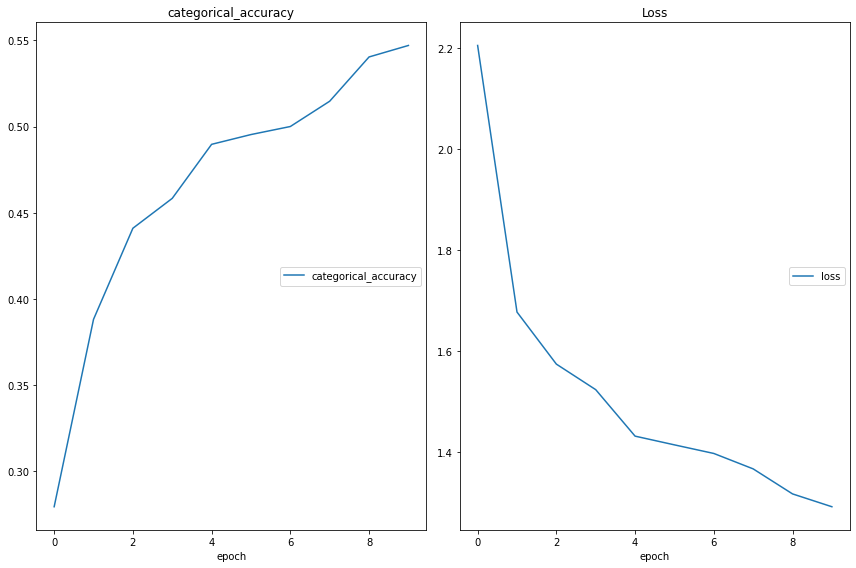

categorical_accuracy
	categorical_accuracy 	 (min:    0.280, max:    0.547, cur:    0.547)
Loss
	loss             	 (min:    1.292, max:    2.206, cur:    1.292)


In [ ]:
model.fit(iter, epochs=10, steps_per_epoch=30, callbacks=[PlotLossesKeras()])